In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
car_data = pd.read_csv('Data_Train (1).csv', index_col=0)

In [133]:
car_data.head(6)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
Name,,,,,,,,,,,,
Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,23.075655,1.75
Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,23.075655,12.50
Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.610000,4.50
Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,23.075655,6.00
Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,23.075655,17.74
Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.10,814.0,55.20,5.0,23.075655,2.35


In [4]:
#finding the null values in each column
car_data.isnull().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

# Observations
* Missing values in Mileage,Engine,Power,Seats,New_Price
* Mileage has two different units, km/kg,kmpl
* Engine and Power also have strings

# Treating engine column

In [5]:
car_data['Engine'] = car_data['Engine'].str.replace(r'\D', '')

In [6]:
car_data['Engine'].head()

Name
Maruti Wagon R LXI CNG               998
Hyundai Creta 1.6 CRDi SX Option    1582
Honda Jazz V                        1199
Maruti Ertiga VDI                   1248
Audi A4 New 2.0 TDI Multitronic     1968
Name: Engine, dtype: object

In [7]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6019 entries, Maruti Wagon R LXI CNG to Chevrolet Beat Diesel
Data columns (total 12 columns):
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(8)
memory usage: 611.3+ KB


In [8]:
car_data['Engine'] = car_data['Engine'].astype(float)

In [9]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6019 entries, Maruti Wagon R LXI CNG to Chevrolet Beat Diesel
Data columns (total 12 columns):
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null float64
Power                5983 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(3), int64(2), object(7)
memory usage: 611.3+ KB


In [10]:
car_data['Engine'].isnull().sum()

36

Replacing the null values with mean

In [11]:
car_data['Engine'].fillna(car_data.Engine.mean(), inplace = True)

In [12]:
car_data.isnull().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                  0
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

# Treating Power column

Removing bhp from the end

In [13]:
car_data['Power'] = car_data['Power'].str.replace(r'bhp','')

In [14]:
car_data.Power.head(4)

Name
Maruti Wagon R LXI CNG              58.16 
Hyundai Creta 1.6 CRDi SX Option    126.2 
Honda Jazz V                         88.7 
Maruti Ertiga VDI                   88.76 
Name: Power, dtype: object

In [15]:
car_data.Power.isnull().sum()

36

Replacing the null value with 0

In [16]:
car_data['Power'] = car_data.Power.str.replace(r'null','0')

In [17]:
car_data['Power'] = car_data['Power'].astype(float)

In [18]:
car_data.Power.head()

Name
Maruti Wagon R LXI CNG               58.16
Hyundai Creta 1.6 CRDi SX Option    126.20
Honda Jazz V                         88.70
Maruti Ertiga VDI                    88.76
Audi A4 New 2.0 TDI Multitronic     140.80
Name: Power, dtype: float64

In [19]:
car_data['Power'].fillna(car_data.Power.mean(), inplace = True)

In [20]:
car_data.Power.isnull().sum()

0

In [21]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6019 entries, Maruti Wagon R LXI CNG to Chevrolet Beat Diesel
Data columns (total 12 columns):
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               6019 non-null float64
Power                6019 non-null float64
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(4), int64(2), object(6)
memory usage: 611.3+ KB


We have eliminated null values in engine and power

# Treating seats column 

In [22]:
car_data['Seats'].fillna(car_data.Seats.mean(), inplace = True)

In [23]:
car_data.isnull().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                  0
Power                   0
Seats                   0
New_Price            5195
Price                   0
dtype: int64

Replaced the null values with mean in seats column

# treating mileage column

In [24]:
car_data['Mileage'].unique()

array(['26.6 km/kg', '19.67 kmpl', '18.2 kmpl', '20.77 kmpl', '15.2 kmpl',
       '21.1 km/kg', '23.08 kmpl', '11.36 kmpl', '20.54 kmpl',
       '22.3 kmpl', '21.56 kmpl', '16.8 kmpl', '25.2 kmpl', '12.7 kmpl',
       '0.0 kmpl', '13.5 kmpl', '25.8 kmpl', '28.4 kmpl', '20.45 kmpl',
       '14.84 kmpl', '22.69 kmpl', '23.65 kmpl', '13.53 kmpl',
       '18.5 kmpl', '14.4 kmpl', '20.92 kmpl', '17.5 kmpl', '12.8 kmpl',
       '19.01 kmpl', '14.53 kmpl', '11.18 kmpl', '12.4 kmpl',
       '16.09 kmpl', '14.0 kmpl', '24.3 kmpl', '18.15 kmpl', '11.74 kmpl',
       '22.07 kmpl', '19.7 kmpl', '25.4 kmpl', '25.32 kmpl', '14.62 kmpl',
       '14.28 kmpl', '14.9 kmpl', '11.25 kmpl', '24.4 kmpl', '16.55 kmpl',
       '17.11 kmpl', '22.9 kmpl', '17.8 kmpl', '18.9 kmpl', '15.04 kmpl',
       '25.17 kmpl', '20.36 kmpl', '13.29 kmpl', '13.68 kmpl',
       '20.0 kmpl', '15.8 kmpl', '25.0 kmpl', '16.4 kmpl', '24.52 kmpl',
       '22.1 kmpl', '8.5 kmpl', '15.1 kmpl', '16.95 kmpl', '19.64 kmpl',
       '16.

From the above information, we can say that there are more kmpl values rather than km/kg hence convert all km/kg to kmpl values

first assumption, 1km/kg = 1kmpl

Removing all km/kg and kmpl values at the end

In [25]:
car_data['Mileage'] = car_data['Mileage'].str.replace(r'km/kg', '')

In [26]:
car_data.Mileage.head()

Name
Maruti Wagon R LXI CNG                   26.6 
Hyundai Creta 1.6 CRDi SX Option    19.67 kmpl
Honda Jazz V                         18.2 kmpl
Maruti Ertiga VDI                   20.77 kmpl
Audi A4 New 2.0 TDI Multitronic      15.2 kmpl
Name: Mileage, dtype: object

In [27]:
car_data['Mileage'] = car_data['Mileage'].str.replace(r'kmpl', '')

In [28]:
car_data.Mileage.head()

Name
Maruti Wagon R LXI CNG               26.6 
Hyundai Creta 1.6 CRDi SX Option    19.67 
Honda Jazz V                         18.2 
Maruti Ertiga VDI                   20.77 
Audi A4 New 2.0 TDI Multitronic      15.2 
Name: Mileage, dtype: object

In [29]:
car_data.Mileage.isnull().sum()

2

In [30]:
car_data['Mileage'] = car_data['Mileage'].astype(float)

In [31]:
car_data['Mileage'].fillna(car_data.Mileage.mean(), inplace = True)

In [32]:
car_data.Mileage.isnull().sum()

0

Now we have replaced the null values in mileage with mean

In [33]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6019 entries, Maruti Wagon R LXI CNG to Chevrolet Beat Diesel
Data columns (total 12 columns):
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6019 non-null float64
Engine               6019 non-null float64
Power                6019 non-null float64
Seats                6019 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(5), int64(2), object(5)
memory usage: 611.3+ KB


# Treating New_Price column 

first remove the text from the column and convert string to float

In [34]:
car_data['New_Price'] = car_data['New_Price'].str.replace(r'Lakh','')

In [35]:
car_data.New_Price.head()

Name
Maruti Wagon R LXI CNG                NaN
Hyundai Creta 1.6 CRDi SX Option      NaN
Honda Jazz V                        8.61 
Maruti Ertiga VDI                     NaN
Audi A4 New 2.0 TDI Multitronic       NaN
Name: New_Price, dtype: object

In [36]:
car_data['New_Price'].unique()

array([nan, '8.61 ', '21 ', '10.65 ', '32.01 ', '47.87 ', '10.57 ',
       '12.33 ', '11.12 ', '23.64 ', '18.64 ', '19.34 ', '49.14 ',
       '11.81 ', '16.65 ', '6.67 ', '6.45 ', '6.41 ', '27 ', '5.13 ',
       '54.43 ', '9.51 ', '9.96 ', '14.44 ', '4.53 ', '95.04 ', '13.49 ',
       '1.28 Cr', '60.88 ', '7.39 ', '69.47 ', '8.78 ', '12.74 ',
       '10.52 ', '11.98 ', '8.54 ', '33.58 ', '9.12 ', '5.29 ', '44.28 ',
       '20.74 ', '11.74 ', '25.52 ', '14.07 ', '95.13 ', '8.34 ', '8.85 ',
       '25.4 ', '16.67 ', '79.43 ', '6.62 ', '1.04 Cr', '58.67 ',
       '28.37 ', '4.48 ', '72.64 ', '36.15 ', '44.59 ', '12 ', '14.65 ',
       '53.72 ', '33.91 ', '12.51 ', '9.74 ', '95.38 ', '60.59 ',
       '11.28 ', '11.48 ', '11.26 ', '43.65 ', '62.07 ', '86.97 ', '1 Cr',
       '4.74 ', '14.84 ', '49.49 ', '48.18 ', '12.34 ', '15.38 ',
       '19.21 ', '22.95 ', '11.15 ', '10.32 ', '28.05 ', '59.77 ',
       '15.86 ', '19.43 ', '42.12 ', '16.95 ', '15.45 ', '7.87 ', '4.7 ',
       '15.02 ', '1

In [50]:
car_data['New_Price'] = car_data['New_Price'].astype(str)

In [78]:
car_data.New_Price.unique()

array(['nan', '8.61 ', '21 ', '10.65 ', '32.01 ', '47.87 ', '10.57 ',
       '12.33 ', '11.12 ', '23.64 ', '18.64 ', '19.34 ', '49.14 ',
       '11.81 ', '16.65 ', '6.67 ', '6.45 ', '6.41 ', '27 ', '5.13 ',
       '54.43 ', '9.51 ', '9.96 ', '14.44 ', '4.53 ', '95.04 ', '13.49 ',
       128.0, '60.88 ', '7.39 ', '69.47 ', '8.78 ', '12.74 ', '10.52 ',
       '11.98 ', '8.54 ', '33.58 ', '9.12 ', '5.29 ', '44.28 ', '20.74 ',
       '11.74 ', '25.52 ', '14.07 ', '95.13 ', '8.34 ', '8.85 ', '25.4 ',
       '16.67 ', '79.43 ', '6.62 ', 104.0, '58.67 ', '28.37 ', '4.48 ',
       '72.64 ', '36.15 ', '44.59 ', '12 ', '14.65 ', '53.72 ', '33.91 ',
       '12.51 ', '9.74 ', '95.38 ', '60.59 ', '11.28 ', '11.48 ',
       '11.26 ', '43.65 ', '62.07 ', '86.97 ', 100.0, '4.74 ', '14.84 ',
       '49.49 ', '48.18 ', '12.34 ', '15.38 ', '19.21 ', '22.95 ',
       '11.15 ', '10.32 ', '28.05 ', '59.77 ', '15.86 ', '19.43 ',
       '42.12 ', '16.95 ', '15.45 ', '7.87 ', '4.7 ', '15.02 ', '12.56 ',
      

In [79]:
car_data.New_Price = car_data.New_Price.astype(float)

In [80]:
car_data.New_Price

Name
Maruti Wagon R LXI CNG                                NaN
Hyundai Creta 1.6 CRDi SX Option                      NaN
Honda Jazz V                                         8.61
Maruti Ertiga VDI                                     NaN
Audi A4 New 2.0 TDI Multitronic                       NaN
Hyundai EON LPG Era Plus Option                       NaN
Nissan Micra Diesel XV                                NaN
Toyota Innova Crysta 2.8 GX AT 8S                   21.00
Volkswagen Vento Diesel Comfortline                   NaN
Tata Indica Vista Quadrajet LS                        NaN
Maruti Ciaz Zeta                                    10.65
Honda City 1.5 V AT Sunroof                           NaN
Maruti Swift VDI BSIV                                 NaN
Land Rover Range Rover 2.2L Pure                      NaN
Land Rover Freelander 2 TD4 SE                        NaN
Mitsubishi Pajero Sport 4X4                         32.01
Honda Amaze S i-Dtech                                 NaN
Maruti Sw

In [81]:
#car_data['New_Price'] = car_data['New_Price'].astype(float)

replacing the null values with mean

In [82]:
car_data['New_Price'].fillna(car_data.New_Price.mean(), inplace = True)

In [83]:
car_data['New_Price'].head()

Name
Maruti Wagon R LXI CNG              23.075655
Hyundai Creta 1.6 CRDi SX Option    23.075655
Honda Jazz V                         8.610000
Maruti Ertiga VDI                   23.075655
Audi A4 New 2.0 TDI Multitronic     23.075655
Name: New_Price, dtype: float64

In [84]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6019 entries, Maruti Wagon R LXI CNG to Chevrolet Beat Diesel
Data columns (total 12 columns):
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6019 non-null float64
Engine               6019 non-null float64
Power                6019 non-null float64
Seats                6019 non-null float64
New_Price            6019 non-null float64
Price                6019 non-null float64
dtypes: float64(6), int64(2), object(4)
memory usage: 771.3+ KB


# Performing statistical analysis 

In [85]:
car_data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price
count,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,2013.358199,5.873838e+04,18.134961,1621.276450,111.227632,5.278735,23.075655,9.479468
std,3.269742,9.126884e+04,4.581528,599.553865,55.294789,0.806012,9.682410,11.187917
min,1998.000000,1.710000e+02,0.000000,72.000000,0.000000,0.000000,3.910000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,74.000000,5.000000,23.075655,3.500000
50%,2014.000000,5.300000e+04,18.150000,1493.000000,93.700000,5.000000,23.075655,5.640000
75%,2016.000000,7.300000e+04,21.100000,1969.000000,138.030000,5.000000,23.075655,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,230.000000,160.000000


Plotting box plot to detect outliers

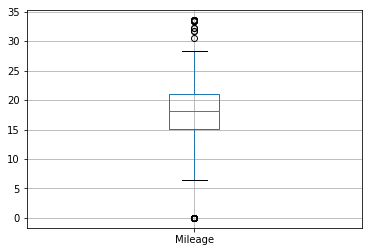

In [86]:
car_data.boxplot(column=['Mileage'])

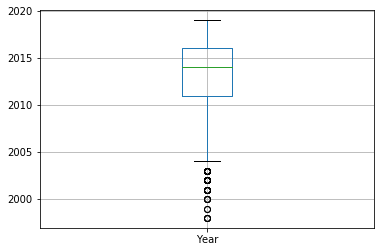

In [87]:
car_data.boxplot(column=['Year'])

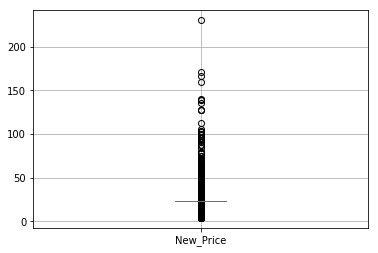

In [88]:
car_data.boxplot(column=['New_Price'])

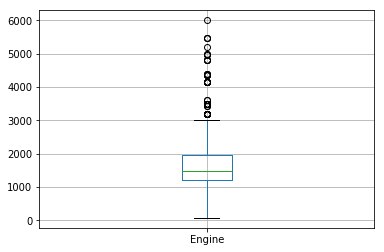

In [89]:
car_data.boxplot(column=['Engine'])

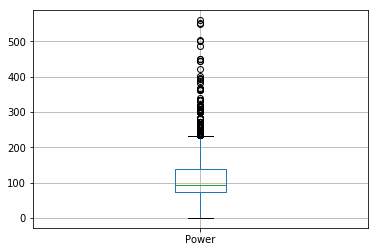

In [90]:
car_data.boxplot(column=['Power'])

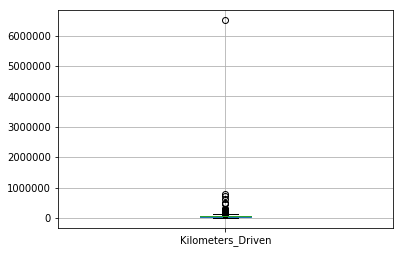

In [93]:
car_data.boxplot(column=['Kilometers_Driven'])

# Calculating correlation

In [98]:
car_data.corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price
Year,1.000000,-0.173048,0.321534,-0.051712,0.070520,0.012204,-0.005758,0.305327
Kilometers_Driven,-0.173048,1.000000,-0.065253,0.091029,0.024197,0.083072,-0.000903,-0.011493
Mileage,0.321534,-0.065253,1.000000,-0.588354,-0.444878,-0.303086,-0.140928,-0.306588
Engine,-0.051712,0.091029,-0.588354,1.000000,0.840934,0.393087,0.251990,0.657118
Power,0.070520,0.024197,-0.444878,0.840934,1.000000,0.108583,0.324198,0.757711
Seats,0.012204,0.083072,-0.303086,0.393087,0.108583,1.000000,-0.003523,0.052118
New_Price,-0.005758,-0.000903,-0.140928,0.251990,0.324198,-0.003523,1.000000,0.427992
Price,0.305327,-0.011493,-0.306588,0.657118,0.757711,0.052118,0.427992,1.000000


# Observations
* Kilometers driven and mileage are having a negative correlation with price
* whereas engine and power are having a high positive correlation with price

# Converting categorical values into numerical (Fuel type and transmission)

x is my feature set and y is the output 

In [115]:
car_data.Price.unique()

array([ 1.75, 12.5 ,  4.5 , ...,  2.27, 17.56,  7.43])

In [103]:
X = car_data[['Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power','Seats','New_Price']].values
X[0:5]

array([[2010, 72000, 'CNG', 'Manual', 'First', 26.6, 998.0, 58.16, 5.0,
        23.075655339805817],
       [2015, 41000, 'Diesel', 'Manual', 'First', 19.67, 1582.0, 126.2,
        5.0, 23.075655339805817],
       [2011, 46000, 'Petrol', 'Manual', 'First', 18.2, 1199.0, 88.7,
        5.0, 8.61],
       [2012, 87000, 'Diesel', 'Manual', 'First', 20.77, 1248.0, 88.76,
        7.0, 23.075655339805817],
       [2013, 40670, 'Diesel', 'Automatic', 'Second', 15.2, 1968.0,
        140.8, 5.0, 23.075655339805817]], dtype=object)

In [104]:
y = car_data['Price']
y[0:5]

Name
Maruti Wagon R LXI CNG               1.75
Hyundai Creta 1.6 CRDi SX Option    12.50
Honda Jazz V                         4.50
Maruti Ertiga VDI                    6.00
Audi A4 New 2.0 TDI Multitronic     17.74
Name: Price, dtype: float64

In [130]:
from sklearn import preprocessing
#le_Fuel= preprocessing.LabelEncoder()
#le_Fuel.fit(['CNG','Petrol','Diesel','Electric','LPG'])
#X[:,2] = le_Fuel.transform(X[:,2]) 
X[0:5]

array([[2010, 72000, 0, 1, 0, 26.6, 998.0, 58.16, 5.0,
        23.075655339805817],
       [2015, 41000, 1, 1, 0, 19.67, 1582.0, 126.2, 5.0,
        23.075655339805817],
       [2011, 46000, 4, 1, 0, 18.2, 1199.0, 88.7, 5.0, 8.61],
       [2012, 87000, 1, 1, 0, 20.77, 1248.0, 88.76, 7.0,
        23.075655339805817],
       [2013, 40670, 1, 0, 2, 15.2, 1968.0, 140.8, 5.0,
        23.075655339805817]], dtype=object)

In [128]:
#le_tran = preprocessing.LabelEncoder()
#le_tran.fit(['Manual','Automatic'])
#X[:,3] = le_tran.transform(X[:,3])
X[0:5]

array([[2010, 72000, 0, 1, 0, 26.6, 998.0, 58.16, 5.0,
        23.075655339805817],
       [2015, 41000, 1, 1, 0, 19.67, 1582.0, 126.2, 5.0,
        23.075655339805817],
       [2011, 46000, 4, 1, 0, 18.2, 1199.0, 88.7, 5.0, 8.61],
       [2012, 87000, 1, 1, 0, 20.77, 1248.0, 88.76, 7.0,
        23.075655339805817],
       [2013, 40670, 1, 0, 2, 15.2, 1968.0, 140.8, 5.0,
        23.075655339805817]], dtype=object)

In [127]:
#le_owner = preprocessing.LabelEncoder()
#le_owner.fit(['First','Second','Fourth & Above', 'Third'])
#X[:,4] = le_owner.transform(X[:,4]) 

X[0:5]


array([[2010, 72000, 0, 1, 0, 26.6, 998.0, 58.16, 5.0,
        23.075655339805817],
       [2015, 41000, 1, 1, 0, 19.67, 1582.0, 126.2, 5.0,
        23.075655339805817],
       [2011, 46000, 4, 1, 0, 18.2, 1199.0, 88.7, 5.0, 8.61],
       [2012, 87000, 1, 1, 0, 20.77, 1248.0, 88.76, 7.0,
        23.075655339805817],
       [2013, 40670, 1, 0, 2, 15.2, 1968.0, 140.8, 5.0,
        23.075655339805817]], dtype=object)

now we have converted categorical values into numerical values
For Fuel type
CNG - 0
Diesel - 1
Electric - 2
LPG - 3
Diesel - 4

For transmission 
Automatic - 0
Manual - 1

For ownertype
First - 0
Fourth & Above - 1
Second - 2
Third - 3

In [132]:
y = car_data['Price']
y[0:5]

Name
Maruti Wagon R LXI CNG               1.75
Hyundai Creta 1.6 CRDi SX Option    12.50
Honda Jazz V                         4.50
Maruti Ertiga VDI                    6.00
Audi A4 New 2.0 TDI Multitronic     17.74
Name: Price, dtype: float64

# Training and Testing the data

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=0)

In [136]:
print("training set:",X_trainset.shape,y_trainset.shape)
print("testing set: ",X_testset.shape,y_testset.shape)

training set: (4815, 10) (4815,)
testing set:  (1204, 10) (1204,)


In [137]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_trainset,y_trainset)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [139]:
print("Coefficents: ",regr.coef_)
print("Intercepts : ",regr.intercept_)

Coefficents:  [ 1.05376334e+00  1.74930882e-06 -7.20975208e-01 -2.75547362e+00
 -3.15205324e-03 -2.49176589e-01  4.08361445e-03  7.30088037e-02
 -1.89616684e+00  2.66221949e-01]
Intercepts :  -2114.9022341302484


# Prediction

In [140]:
from sklearn.metrics import r2_score
y_hat = regr.predict(X_testset)
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y_testset) ** 2))
print('Variance score: %.2f' % regr.score(X_testset, y_testset))
print("R2-score: %.2f" % r2_score(y_hat ,y_testset))

Residual sum of squares: 35.86
Variance score: 0.70
R2-score: 0.64
